In [1]:
import pandas as pd #for data importing and manupulation
import numpy as np  #for data manupulation and cleaning
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

In [2]:
from scipy.stats import hmean, gmean

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')

In [4]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [5]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [6]:
train['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

In [7]:
len(SampleSubmission)

672

In [8]:
train.shape,test.shape

((1568, 27), (672, 26))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

In [13]:
train['Recency'].value_counts()

63    28
72    27
56    24
17    24
10    23
      ..
66     9
95     8
14     8
29     7
51     7
Name: Recency, Length: 100, dtype: int64

In [18]:
test['Cmp5Accepted'].value_counts()

0    635
1     37
Name: Cmp5Accepted, dtype: int64

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

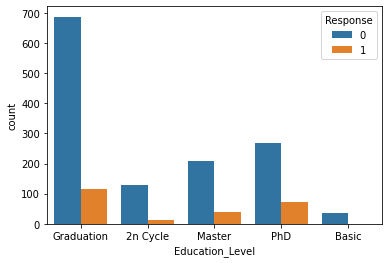

In [19]:
sns.countplot(train['Education_Level'], hue='Response', data=train)

<AxesSubplot:xlabel='No_of_Kids_in_home', ylabel='count'>

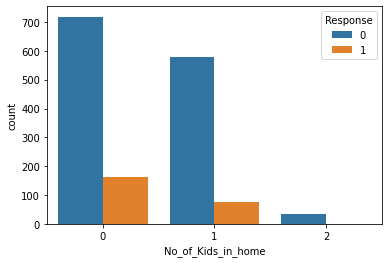

In [26]:
sns.countplot(train['No_of_Kids_in_home'], hue='Response', data=train)

In [20]:
pd.crosstab(train['Marital_Status'],train['Response'], normalize=True)

Response,0,1
Marital_Status,,
Absurd,0.000000,0.000638
Alone,0.001276,0.000638
Divorced,0.080995,0.020408
Married,0.342474,0.049745
Single,0.164541,0.045281
Together,0.234694,0.026148
Widow,0.022959,0.008929
YOLO,0.000638,0.000638


In [22]:
train.dtypes[train.dtypes == 'int64']

Year_of_Birth              int64
No_of_Kids_in_home         int64
No_of_Teen_in_home         int64
Recency                    int64
Discounted_Purchases       int64
WebPurchases               int64
CatalogPurchases           int64
StorePurchases             int64
Amount_on_Wines            int64
Amount_on_Fruits           int64
Amount_on_MeatProducts     int64
Amount_on_FishProducts     int64
Amount_on_SweetProducts    int64
Amount_on_GoldProds        int64
WebVisitsMonth             int64
Cmp3Accepted               int64
Cmp4Accepted               int64
Cmp5Accepted               int64
Cmp1Accepted               int64
Cmp2Accepted               int64
Any_Complain               int64
Response                   int64
dtype: object

In [23]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [24]:
train['Year_of_Birth'].value_counts()

1977    70
1972    65
1973    58
1971    57
1966    57
1979    56
1976    55
1970    55
1974    50
1975    46
1967    40
1953    40
1959    39
1956    37
1980    37
1960    34
1957    33
1978    32
1969    32
1983    32
1982    32
1968    31
1955    31
1964    31
1958    28
1987    27
1962    27
1981    26
1963    26
1961    26
1984    26
1985    26
1952    24
1986    24
1954    23
1950    22
1951    22
1989    22
1990    21
1988    19
1965    19
1949    17
1991    16
1948    14
1992    12
1947    11
1993     9
1946     8
1944     6
1996     5
1994     4
1995     3
1945     2
1942     1
1997     1
1900     1
Name: Year_of_Birth, dtype: int64

In [25]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


Absurd	0.000000	0.000638
Alone	0.001276	0.000638
Divorced	0.080995	0.020408
Married	0.342474	0.049745
Single	0.164541	0.045281
Together	0.234694	0.026148
Widow	0.022959	0.008929
YOLO

In [19]:
test['form_field47'] = test['form_field47'].replace({'charge':1, 'lending':0})

In [27]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [30]:
test['WebVisitsMonth'].value_counts

<bound method IndexOpsMixin.value_counts of 0      8
1      6
2      6
3      2
4      5
      ..
667    6
668    5
669    7
670    3
671    5
Name: WebVisitsMonth, Length: 672, dtype: int64>

In [31]:
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

In [32]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [33]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [34]:
train.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
dtype: int64

In [35]:
train.to_csv('aired7_train.csv', index=False)
test.to_csv('aired7_test.csv', index=False)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split

In [39]:
train = pd.read_csv('aired7_train.csv')
test = pd.read_csv('aired7_test.csv')

In [40]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [41]:
train.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [43]:
test_id = test['ID']

In [44]:
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

In [50]:
train = train.drop('Education_Level', axis=1)
test = test.drop('Education_Level', axis=1)

In [51]:
train = train.drop('Marital_Status', axis=1)
test = test.drop('Marital_Status', axis=1)

In [52]:
train = train.drop('Date_Customer', axis=1)
test = test.drop('Date_Customer', axis=1)

In [53]:
X = train.drop('Response', axis=1)
y = train.Response

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10000000) 

In [55]:
from sklearn.metrics import auc

In [56]:
model=CatBoostClassifier(n_estimators=300000,eval_metric='AUC',max_depth=5,learning_rate=0.1,od_wait=50, 
                              subsample=0.9,bootstrap_type='Bernoulli',metric_period=20,
                     l2_leaf_reg=7,
                         #bagging_temperature=0.85,
                         random_strength=10000,
                     use_best_model=True)

In [57]:
model.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	test: 0.6354276	best: 0.6354276 (0)	total: 421ms	remaining: 1d 11h 2m 35s
20:	test: 0.8485166	best: 0.8485166 (20)	total: 510ms	remaining: 2h 1m 28s
40:	test: 0.8962187	best: 0.8962187 (40)	total: 594ms	remaining: 1h 12m 24s
60:	test: 0.9109948	best: 0.9109948 (60)	total: 705ms	remaining: 57m 48s
80:	test: 0.9095986	best: 0.9135544 (64)	total: 858ms	remaining: 52m 57s
100:	test: 0.9086678	best: 0.9141361 (87)	total: 942ms	remaining: 46m 37s
120:	test: 0.9079697	best: 0.9141361 (87)	total: 996ms	remaining: 41m 8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9141361257
bestIteration = 87

Shrink model to first 88 iterations.


In [58]:
pred = model.predict_proba(test)[:, 1]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100000000)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb=[]
y_pred_totcb=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=KFold(n_splits=4, shuffle=True, random_state=100000)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostClassifier(n_estimators=500000,eval_metric='AUC',max_depth=4,learning_rate=0.1,#reg_lambda=5,#5
                              subsample=0.9,bootstrap_type='Bernoulli',#leaf_estimation_iterations=10,
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     use_best_model=True)
    #CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=5,learning_rate=0.1,reg_lambda=5,#5
                              #subsample=0.9,bootstrap_type='Bernoulli',
                    #l2_leaf_reg=5,#bagging_temperature=0.85,random_strength=100,
                     #use_best_model=True)
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb.append(roc_auc_score(y_test,preds))
    p = m.predict_proba(test)[:, 1]
    y_pred_totcb.append(p)

0:	test: 0.6936284	test1: 0.7561687	best: 0.7561687 (0)	total: 14.2ms	remaining: 1h 58m 7s
100:	test: 0.9714595	test1: 0.9057144	best: 0.9125284 (29)	total: 284ms	remaining: 23m 23s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9125283915
bestIteration = 29

Shrink model to first 30 iterations.
err:  0.9125283914928762
0:	test: 0.7050677	test1: 0.7265562	best: 0.7265562 (0)	total: 2.88ms	remaining: 23m 59s
100:	test: 0.9748099	test1: 0.8925954	best: 0.8972139 (53)	total: 561ms	remaining: 46m 18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8972138554
bestIteration = 53

Shrink model to first 54 iterations.
err:  0.8972138554216867
0:	test: 0.7176753	test1: 0.7167083	best: 0.7167083 (0)	total: 11.6ms	remaining: 1h 36m 36s
100:	test: 0.9720244	test1: 0.8778465	best: 0.8780220 (98)	total: 476ms	remaining: 39m 14s
200:	test: 0.9951725	test1: 0.8802598	best: 0.8812689 (190)	total: 753ms	remaining: 31m 12s
300:	test: 0.9993121	test1: 0.8807863	b

In [61]:
np.mean(errcb)

0.8826509120092608

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb1=[]
y_pred_totcb1=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=15, shuffle=True, random_state=100000)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m1=CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,od_wait=50, reg_lambda=3,
                              bootstrap_type='Bayesian',
                     use_best_model=True)
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m1.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb1.append(roc_auc_score(y_test,preds))
    p1 = m1.predict_proba(test)[:, 1]
    y_pred_totcb1.append(p1)

0:	test: 0.7396230	test1: 0.6214815	best: 0.6214815 (0)	total: 2.97ms	remaining: 2.96s
100:	test: 0.9606141	test1: 0.8748148	best: 0.8844444 (78)	total: 269ms	remaining: 2.4s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8844444444
bestIteration = 78

Shrink model to first 79 iterations.
err:  0.8844444444444445
0:	test: 0.6994354	test1: 0.5974074	best: 0.5974074 (0)	total: 3.9ms	remaining: 3.9s
100:	test: 0.9615689	test1: 0.9140741	best: 0.9296296 (61)	total: 285ms	remaining: 2.54s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9296296296
bestIteration = 61

Shrink model to first 62 iterations.
err:  0.9296296296296296
0:	test: 0.7366074	test1: 0.7103611	best: 0.7103611 (0)	total: 4.55ms	remaining: 4.55s
100:	test: 0.9538144	test1: 0.9364207	best: 0.9395604 (87)	total: 294ms	remaining: 2.62s
200:	test: 0.9855933	test1: 0.9379906	best: 0.9442700 (111)	total: 616ms	remaining: 2.45s
Stopped by overfitting detector  (100 iterations wait)

bestT

In [64]:
np.mean(errcb1)

0.9026567024896962

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb2=[]
y_pred_totcb2=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=15, shuffle=True, random_state=10000)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m2=CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,od_wait=50, reg_lambda=3,
                              bootstrap_type='Bayesian',
                     use_best_model=True)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m2.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb2.append(roc_auc_score(y_test,preds))
    p2 = m2.predict_proba(test)[:, 1]
    y_pred_totcb2.append(p2)

0:	test: 0.7290913	test1: 0.8298611	best: 0.8298611 (0)	total: 10.4ms	remaining: 10.4s
100:	test: 0.9559805	test1: 0.9039352	best: 0.9311343 (6)	total: 308ms	remaining: 2.74s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9311342593
bestIteration = 6

Shrink model to first 7 iterations.
err:  0.9311342592592592
0:	test: 0.7393141	test1: 0.8338904	best: 0.8338904 (0)	total: 11.5ms	remaining: 11.5s
100:	test: 0.9567535	test1: 0.9137701	best: 0.9204545 (56)	total: 506ms	remaining: 4.5s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9204545455
bestIteration = 56

Shrink model to first 57 iterations.
err:  0.9204545454545454
0:	test: 0.7431507	test1: 0.6909323	best: 0.6909323 (0)	total: 10.3ms	remaining: 10.3s
100:	test: 0.9560518	test1: 0.8684547	best: 0.8818646 (74)	total: 329ms	remaining: 2.92s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8818646232
bestIteration = 74

Shrink model to first 75 iterations.
err:  0.8818646

In [66]:
np.mean(errcb2)

0.9024378070783696

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb3=[]
y_pred_totcb3=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=20, shuffle=True, random_state=10000)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m3=CatBoostClassifier(n_estimators=1000,eval_metric='AUC',max_depth=4,learning_rate=0.1,od_wait=50, reg_lambda=3,
                              bootstrap_type='Bayesian',
                     use_best_model=True)
    m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m3.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb3.append(roc_auc_score(y_test,preds))
    p3 = m3.predict_proba(test)[:, 1]
    y_pred_totcb3.append(p3)

0:	test: 0.7348982	test1: 0.7933790	best: 0.7933790 (0)	total: 15ms	remaining: 15s
100:	test: 0.9559847	test1: 0.8972603	best: 0.8972603 (80)	total: 314ms	remaining: 2.79s
200:	test: 0.9852622	test1: 0.8926941	best: 0.9063927 (125)	total: 580ms	remaining: 2.31s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9063926941
bestIteration = 125

Shrink model to first 126 iterations.
err:  0.9063926940639269
0:	test: 0.7083716	test1: 0.7165775	best: 0.7165775 (0)	total: 10.5ms	remaining: 10.5s
100:	test: 0.9529961	test1: 0.9438503	best: 0.9451872 (98)	total: 323ms	remaining: 2.87s
200:	test: 0.9866995	test1: 0.9451872	best: 0.9465241 (105)	total: 592ms	remaining: 2.35s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.9465240642
bestIteration = 105

Shrink model to first 106 iterations.
err:  0.946524064171123
0:	test: 0.7305459	test1: 0.8177083	best: 0.8177083 (0)	total: 8.26ms	remaining: 8.25s
100:	test: 0.9591068	test1: 0.8958333	best: 0.9369792 (5)	

In [68]:
np.mean(errcb3)

0.9044560670107991

In [69]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
errcb4=[]
y_pred_totcb4=[]
from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit
fold=KFold(n_splits=15)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m4=XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=800, silent=True, metrics='auc',colsample_bylevel=0.8, reg_alpha=0.8)
    m4.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m4.predict_proba(X_test)[:, 1]
    print("err: ",roc_auc_score(y_test,preds))
    errcb4.append(roc_auc_score(y_test,preds))
    p4 = m4.predict_proba(test)[:, 1]
    y_pred_totcb4.append(p4)

[0]	validation_0-error:0.088175	validation_1-error:0.133333
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.012303	validation_1-error:0.142857
Stopping. Best iteration:
[13]	validation_0-error:0.075871	validation_1-error:0.114286

err:  0.8085185185185185
[0]	validation_0-error:0.091593	validation_1-error:0.085714
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[100]	validation_0-error:0.01162	validation_1-error:0.12381
Stopping. Best iteration:
[0]	validation_0-error:0.091593	validation_1-error:0.085714

err:  0.7762951334379905
[0]	validation_0-error:0.089542	validation_1-error:0.12381
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 

In [70]:
np.mean(errcb4)

0.8485485517711526

In [72]:
SampleSubmission.columns

Index(['ID', 'Response'], dtype='object')

In [73]:
d = {"ID": test_id, 'Response': np.mean(y_pred_totcb, 0)}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["ID", 'Response']]

In [74]:
test_predictions.to_csv('ci1.csv', index=False)

In [75]:
test_predictions.head()

,ID,Response
0,ID_ZPMABNVX,0.119447
1,ID_WFE91NAA,0.138140
2,ID_JV11RBRK,0.044416
3,ID_6B7SVKY9,0.411371
4,ID_GOVUZ545,0.136669


In [55]:
d = {"Applicant_ID": test_id, 'default_status': np.mean(y_pred_totcb1, 0)}
test_predictioned = pd.DataFrame(data=d)
test_predictioned = test_predictioned[["Applicant_ID", 'default_status']]

In [56]:
test_predictioned.to_csv('cred101.csv', index=False)

In [57]:
test_predictioned.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.315576
1,Apcnt_1000048,0.338098
2,Apcnt_1000052,0.388762
3,Apcnt_1000076,0.739122
4,Apcnt_1000080,0.186167


In [58]:
d = {"Applicant_ID": test_id, 'default_status': np.mean(y_pred_totcb2, 0)}
test_prediction = pd.DataFrame(data=d)
test_prediction = test_prediction[["Applicant_ID", 'default_status']]

In [59]:
test_prediction.to_csv('cred102.csv', index=False)

In [60]:
test_prediction.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.339145
1,Apcnt_1000048,0.356503
2,Apcnt_1000052,0.385306
3,Apcnt_1000076,0.749346
4,Apcnt_1000080,0.203729


In [1]:
d = {"Applicant_ID": test_id, 'default_status': np.mean(y_pred_totcb3, 0)}
test_predictioning = pd.DataFrame(data=d)
test_predictioning = test_prediction[["Applicant_ID", 'default_status']]

NameError: name 'test_id' is not defined

In [62]:
test_prediction.to_csv('cred103.csv', index=False)

In [63]:
test_predictioning.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.339145
1,Apcnt_1000048,0.356503
2,Apcnt_1000052,0.385306
3,Apcnt_1000076,0.749346
4,Apcnt_1000080,0.203729


In [64]:
d = {"Applicant_ID": test_id, 'default_status': np.mean(y_pred_totcb4, 0)}
test_predicto = pd.DataFrame(data=d)
test_predicto = test_predicto[["Applicant_ID", 'default_status']]

In [65]:
test_predicto.to_csv('cred104.csv', index=False)

In [66]:
test_predicto.head()

,Applicant_ID,default_status
0,Apcnt_1000032,0.335721
1,Apcnt_1000048,0.365520
2,Apcnt_1000052,0.388050
3,Apcnt_1000076,0.706668
4,Apcnt_1000080,0.132941


In [67]:
a = pd.read_csv('cred101.csv')
b = pd.read_csv('cred102.csv')
c = pd.read_csv('cred103.csv')
d = pd.read_csv('cred104.csv')
e = pd.read_csv('cred100.csv')

In [68]:
e['default_status'].corr(a['default_status'])

0.998159083380776

In [69]:
test_predictions['default_status'].corr(test_predictioned['default_status'])

0.9981590833807757

In [103]:
test_predictions['default_status'] = (a['default_status'] * 1.0 + b['default_status'] * 0.85 + c['default_status'] * 0.80 + d['default_status']* 0.74 + e['default_status'] * 0.63).round(2)

In [104]:
test_predictions.to_csv('cred_stack17.csv', index=False)

In [105]:
from catboost import CatBoostClassifier

In [106]:
train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,1,-999.000000,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,-999.0,0.0,1,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,1,-999.000000,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,-999.0,0.0,1,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,1,97.887502,1.427891,0.045630,0


In [74]:
test.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,-999.0000,0.825000,1.01,0.800000,-999.0,0.0,1,-999.000000,0.000000,0.011221
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,0,-999.000000,0.504974,0.043525
2,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,0.0,...,-999.0000,-999.000000,0.00,-999.000000,-999.0,-999.0,1,-999.000000,0.000000,-999.000000
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,-999.0000,0.916663,2.02,0.464224,-999.0,-999.0,1,90.163742,0.788809,0.104029
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,-999.0000,0.234047,23.23,0.726688,0.0,0.0,0,1303.587148,1.637733,0.163124


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1234567)

In [77]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [78]:
model=CatBoostClassifier(iterations=1000, #leaf_estimation_iterations=10,#800
                              learning_rate=0.1,
                              depth=4,#loss_function='MultiClass',#,scale_pos_weight=200,
                             #l2_leaf_reg=5,
                             bootstrap_type='Bernoulli',
                              subsample=0.9,
                              eval_metric='AUC',
                              metric_period=20,
                                   #class_weight s=0,
                              #od_type='Iter',
                              #od_wait=45,
                              #random_seed=10,
                              allow_writing_files=False)

In [79]:
model.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_val, y_val))

0:	test: 0.7792176	best: 0.7792176 (0)	total: 100ms	remaining: 1m 40s
20:	test: 0.8310173	best: 0.8310173 (20)	total: 1.53s	remaining: 1m 11s
40:	test: 0.8362049	best: 0.8362049 (40)	total: 2.57s	remaining: 1m
60:	test: 0.8389502	best: 0.8389502 (60)	total: 3.53s	remaining: 54.3s
80:	test: 0.8407009	best: 0.8407009 (80)	total: 4.37s	remaining: 49.6s
100:	test: 0.8421679	best: 0.8421679 (100)	total: 5.14s	remaining: 45.8s
120:	test: 0.8432079	best: 0.8432079 (120)	total: 5.91s	remaining: 42.9s
140:	test: 0.8439378	best: 0.8439378 (140)	total: 6.64s	remaining: 40.4s
160:	test: 0.8445321	best: 0.8445321 (160)	total: 7.37s	remaining: 38.4s
180:	test: 0.8448139	best: 0.8448139 (180)	total: 8.1s	remaining: 36.6s
200:	test: 0.8448682	best: 0.8448682 (200)	total: 8.83s	remaining: 35.1s
220:	test: 0.8450518	best: 0.8450518 (220)	total: 9.55s	remaining: 33.7s
240:	test: 0.8452872	best: 0.8452872 (240)	total: 10.3s	remaining: 32.4s
260:	test: 0.8453715	best: 0.8453715 (260)	total: 11s	remaining: 

In [80]:
y_pred=model.predict_proba(test)[:, 1]

In [81]:
from sklearn.metrics import roc_auc_score

In [82]:
print(roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))

0.8462640806595095


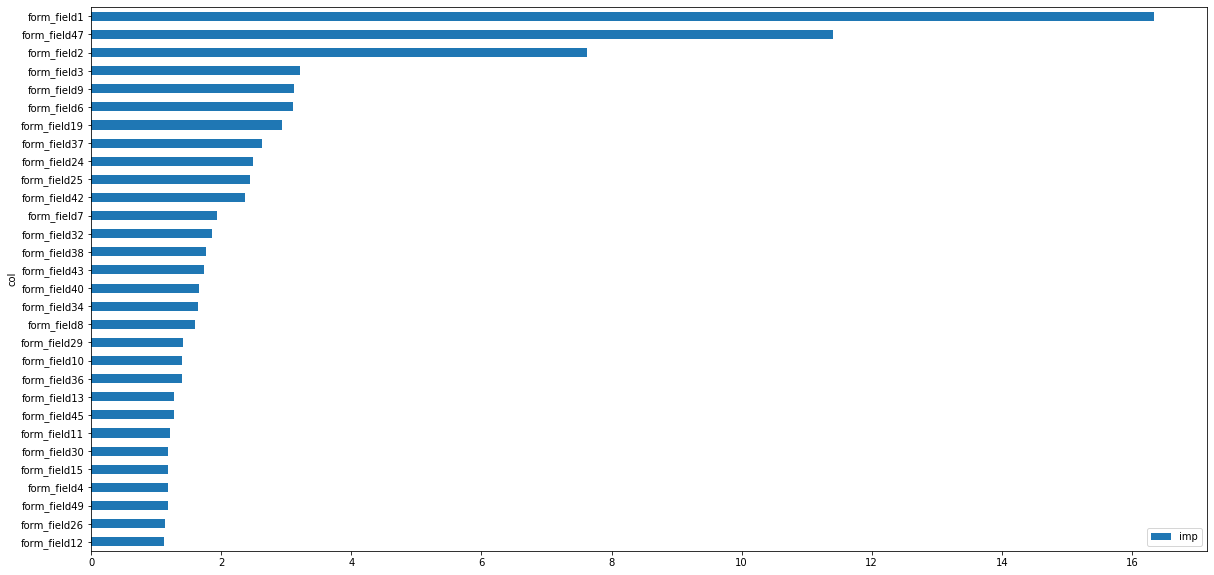

In [83]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
plt.savefig('catboost_feature_importance.png')

In [107]:
test_predictions.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1.35
1,Apcnt_1000048,1.43
2,Apcnt_1000052,1.55
3,Apcnt_1000076,2.97
4,Apcnt_1000080,0.74


In [108]:
test_predictions.to_csv(r'C:\Users\Grade A\Desktop\DSN_AI_BOOTCAMP_QUALIFICATION\s42.csv', index=False)